# The Discrete Fourier Transform


We have information in the form of a discrete *signal* or equivalently an 
$N$-element real-valued *vector* $\tilde{x}$. For some mysterious reason we wish 
to express this information in terms of a *transform* vector $\tilde{X}$, also of size $N$. 
(By the way $\tilde{x}$ could be complex-valued but let's make it
real-valued.) To distinguish the signal vector $\tilde{x}$ from the transform vector
$\tilde{X}$ on an element-wise basis let's use a convention that the $\tilde{X}$ subscript 
will be $k$ and the $\tilde{x}$ subscript will be $n$. Also we number elements starting
at element zero: The first element of $\tilde{x}$ is $x_0$.


An example signal: $\tilde{x} = \{ 0.2, 3.9, -1.1, -12.0, 0.1, 0.0, -4.4 \}$ which has $N = 7$ values. $x_2 = -1.1$.


Here is the definition of the *forward* discrete Fourier transform:


$\begin{align}
X_k = \sum_{n = 0}^{N-1} x_n \cdot e^{-i\frac{2 \pi}{N} \cdot n \cdot k}
\end{align}$


There are $N$ such values of $X_k$; each a complex number. In English we say
"The $k^{th}$ element of the Fourier transform of $\tilde{x}$ is a sum over
all the elements of $\tilde{x}$ each multiplied by a number on the complex
unit circle."


Now to define the inverse discrete Fourier transform:


$\begin{align}
x_n = \frac{1}{N} \sum_{k = 0}^{N-1} X_k \cdot e^{+i\frac{2 \pi}{N} \cdot n \cdot k}
\end{align}$


As with the *forward* transform this equation gives one of the $N$ values of
$\tilde{x}$ so we repeat this operation $N$ times to recover *all* the 
elements of $\tilde{x}$. And it goes without saying that we *hope* the 
recovered version is the same as the original!


Note: The inverse transform has an asymmetric leading coefficient $1/N$. 
This is another *convention* that ensures the *inverse* transform
of the *forward* transform returns the original signal $\tilde{x}$. 
We can also adopt a symmetrical convention: Both transforms have a leading
coefficient of $\sqrt{1/N}$. This also gets us "back to where we started".


I can't resist pointing out another connection to linear algebra: When we
have a linear transform -- say a matrix $A$ --  and we seek its inverse: 
We must include in the inverse a leading coefficient $\frac{1}{det \; A}$. 
This ensures the inverse transform $A^{-1}$ restores the original volume
of the vector space. 


### Constituent waves: Reconstructing $\tilde{x}$


Let's proceed to a nuts and bolts computation.
[Osgood's Stanford lecture](https://youtu.be/gZNm7L96pfY?si=_5uOQOMxDiOX5QaB) 
asserts that Fourier machinery has two complementary parts: Analysis and Synthesis. 
Interpreting the transform vector $\tilde{X}$ is *Analysis*. Reconstructing $\tilde{x}$ 
from $\tilde{X}$ is a type of *Synthesis*.


The claim is that the *Analysis* begins by decomposing $\tilde{x}$ as a sum of constituent 
*sine* waves. We hope to make progress in understanding this claim in some detail. 
The calculation below starts down this path by demonstrating that the machinery
works as advertised: The inverse transform of the transform of something gets us 
back to what we started with.


***Preparatory Remark 1:*** Here is an identity from our trigonometry days, taking $x$
as a variable and $\alpha$ as a constant: 


$\begin{align}
\sin(x + \alpha) = \sin x \cdot \cos \alpha + \cos x \cdot \sin \alpha = 
A \cdot \sin x  + B \cdot \cos x
\end{align}$


Interpretation: Adding a sine and a cosine of the same frequency together, 
weighted by constants $A$ and $B$, produces a single 
sine wave that is shifted by some amount, this amount often called a 
*phase shift*; the parameter $\alpha$. 


***Preparatory Remark 2:*** 'Constituent waves' relates to an idea from
linear algebra, to wit *basis vectors*. A sine wave is analogous to
$\hat{i} = (1, 0)$; and some other sine wave is analogous to $\hat{j} = (0, 1)$. 
The $\tilde{x}$ signal will commonly hold dozens, hundreds or 
thousands of independent values; a much higher dimensionality compared to
linear algebra lectures that feature two or perhaps three dimensions.
The point of the remark is simply that there is a conceptual similarity
between the simplicity of sine waves and the simplicity of basis directions
in a multi-dimensional linear space.


Now to a first exercise: Defining, transforming, and reconstructing some signal $\tilde{x}$ 
using constituent sine and cosine waves.

[Text(0.5, 1.0, 'recovered imaginary part of x')]

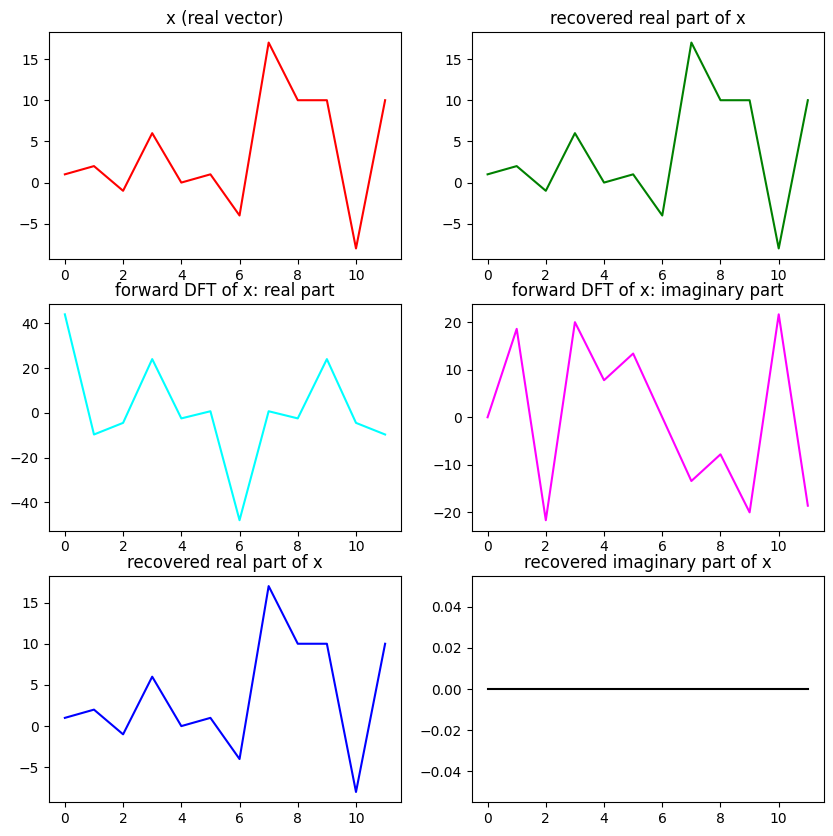

In [1]:
from matplotlib import pyplot as plt
from math import pi
from cmath import exp                   # handles complex exponentiation

x = [1, 2, -1, 6, 0, 1, -4, 17, 10, 10, -8, 10]
N = len(x)
i_imag = complex(0, 1)                  # this is how complex numbers can be defined in Python

X = []                                  # this will be the Discrete Fourier Transform of x[]

for k in range(N):
    cumulative_sum = complex(0, 0)
    for n in range(N): cumulative_sum += x[n]*exp((-i_imag*2*pi/N)*(n*k))
    X.append(cumulative_sum)

xr = []          # this will be the reconstructed version of x

for n in range(N):
    cumulative_sum = complex(0, 0)
    for k in range(N): cumulative_sum += (1/N)*X[k]*exp((i_imag*2*pi/N)*(n*k))
    xr.append(cumulative_sum)

X_real,  X_imag  = [q.real for q in X],  [q.imag for q in X]
xr_real, xr_imag = [q.real for q in xr], [round(q.imag, 3) for q in xr]

fig, axs=plt.subplots(3, 2, figsize=(10, 10))

axs[0, 0].plot(x, c='red')
axs[0, 1].plot(xr_real, c='green')
axs[1, 0].plot(X_real, c='cyan')
axs[1, 1].plot(X_imag, c='magenta')
axs[2, 0].plot(xr_real, c='blue')
axs[2, 1].plot(xr_imag, c='k')

axs[0, 0].set(title='x (real vector)')
axs[0, 1].set(title='recovered real part of x')
axs[1, 0].set(title='forward DFT of x: real part')
axs[1, 1].set(title='forward DFT of x: imaginary part')
axs[2, 0].set(title='recovered real part of x')
axs[2, 1].set(title='recovered imaginary part of x')

***Interpretation 1***: From the real-valued vector $\tilde{x}$ we produced 
a new vector $\tilde{X}$ with the same size; but consisting of complex, rather 
than real values. This *transform* of $\tilde{x}$ is shown in the middle
pair of charts and we observe it includes two symmetries. The real part of
the transform has mirror reflection symmetry about element 7. The imaginary
part of the transform has mirror-plus-vertical-flip symmetry. That is:
Reflect it left-right about element 7 and then reflect it a second
time about the horizontal axis by multiplying by $-1$: And we are back 
where we started.


***Interpretation 2***: The recovery vector $\tilde{x_r}$ is constructed from
the transform vector $\tilde{X}$ with no reference whatsoever to the original
vector $\tilde{x}$. This implies that a *description* of the original vector is
somehow encoded or distributed *across* the transform vector $\tilde{X}$. Furthermore 
in reconstructing the original, each recovered element is built as a sum over
*all* the elements of $\tilde{X}$. We can infer that $\tilde{X}$ represents
a *layering* or *superposition* of information about $\tilde{x}$. Indeed the 
construction of $\tilde{X}$ involved repeated passes over all the elements of 
$\tilde{x}$.


***Interpretation 3***: So what's the big point, the big idea here? I will 
repeat the claim: That the discrete Fourier transform is a disassembly of an arbitrary 
signal (piece of information) called $\tilde{x}$ into a set of sine and cosine 
waves that are individually *weighted*. The sines and cosines are *understood*
(and are spelled out in the complex exponentials $e^{-i \cdot etcetera}$); 
and the key to this arrangement is that the information is encoded in the 
*weights*. Those weights *are* the elements of the transform vector $\tilde{X}$.



# Read no further

I left off here (9/25/2024)

* Technically we went from $N$ real values to $2\cdot N$ real values: Two for every complex $X_k$
    * So maybe it is a bit of a relief that there is all the symmetry.
    * We could throw the second half away without loss of information.
    * Nyquist


### Continuing the narrative



- $\tilde{X}$ is the *forward* Fourier Transform (FT) of some vector of real numbers $\tilde{x}$.
- $\tilde{x}$ can be reconstructed by applying the *inverse* FT to $\tilde{X}$.
- The *inverse* differs from the *forward* by a leading $\frac{1}{N}$ and by
a $+$ sign in the complex exponential; which makes the imaginary cosine
function positive rather than negative. 
- For each $x_n$ the reconstruction calculation is $\frac{1}{N}$ times a sum over a $k$ index.
    - This $k$ takes values $0, 1, 2, \dots, N-1$. 
    - The argument of the sum is $X_k$ multiplied by $w_{k, n}$. 


Let's digress for a moment: Here $w$ is
a complex exponential; and as it has two indices it 
can be represented as a square $N \times N$ matrix;
a linear transform in the grand scheme of $\tilde{x} = w \tilde{X}$.


- $w_{k, n} = \cos(\alpha) + i \sin(\alpha)$ where $\alpha = \frac{2 \pi k n}{N}$.
- As $w_{k, n}$ is a complex number, the calculation is a sum over $N$ products of two complex numbers $X_k$ and $w_{k, n}$.


So let's take a moment to restate the premise here for the sake of familiarity.


- For any index $n$ the value of the $\tilde{x}$ component $x_n$ is 
$1/N$ times a sum of $N$ products
- Let us look more closely to break this *product* down in terms of knowns
    - Picture the graph of the $N$ values of $\tilde{x}$.
        - Each point $x_i$ is a sum of $N$ complex products


The goal of the code is to graph the constituent sine and cosine waves


- Each wave has a characteristic period
- Each wave has a characteristic amplitude
- There are $2 \times N$ such waves: $N$ sines and $N$ cosines
- Their sum is advertised as being equal to $\tilde{x}$.


Skeleton code: The code below is some working Python mixed with
some English. Convert the English to Python and see how it goes.
It presumes there is a forward Discrete Fourier Transform function
**`DFT(x)`** that returns five arguments: **`Xr, Xi, Xd, Xa, N`**.


```
fig, axs = plt.subplots(3, figsize=(10,12))

# Let's design x to be a square wave for starters

nquarter = 20
x = [-.5]*nquarter
x = x + [0.5]*nquarter*2
x = x + [-.5]*nquarter
x.append(-.5)                   # life is simpler if our vector x has odd length

Xr, Xi, Xd, Xa, N = DFT(x)

nWavesToPlot = 3          # start by showing the first 3 sine and cosine waves

sum_wave = [0.]*N         # sum_wave is just what it sounds like... will it look like x?

for k in range(nWavesToPlot):
    initialize two empty lists: to be the next waves
    for n in range(N):
        append a value to list 1     # real part only; ignore the imaginative for now
        append a value to list 2     # real part only; ditto
    plot list 1 on axs[0]
    plot list 2 on axs[1]
    add these waves to sum_wave; here is one way to do this:
    sum_wave = [sum(c) for c in zip(sum_wave, [sum(c) for c in zip(coswave, sinwave)])] 

plot sum_wave on axs[2]

fig.show()
```


Later: Verify the reconstructed $\tilde{x}$ has Zeros in its imaginative part.

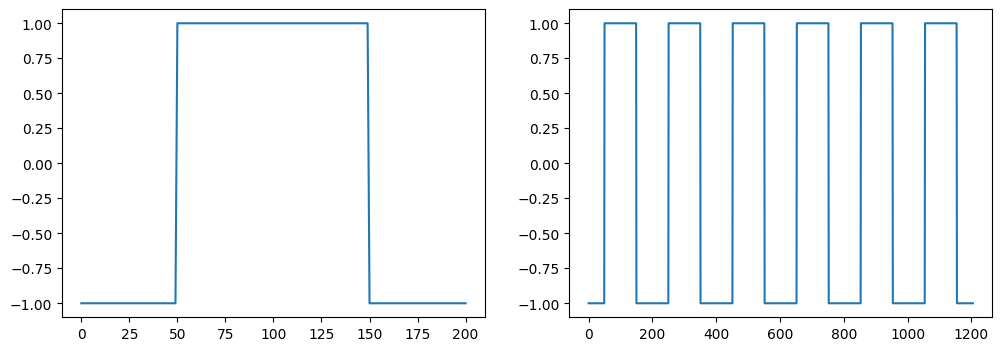

In [2]:
from matplotlib import pyplot as plt
from math import pi, sin, cos

from math import atan2, sqrt
from random import randint, random
from numpy import arange
import numpy as np
import matplotlib.image as mpimg
from numpy.fft import fft2, ifft2
from numpy import abs as magnitude

fig,axs=plt.subplots(1,2, figsize=(12, 4))

x = [1, 2, 3, 5, 2, 4, -2, -1]

x = [randint(0,10)-5 for i in range(100)]

x, segment = [], 50

low = -1.
high = 1.
for i in range(segment): x.append(low)
for i in range(2*segment): x.append(high)
for i in range(segment): x.append(low)
x.append(low)   # making N odd results in a cleaner FT

x_rep = x + x + x + x + x + x

axs[0].plot(x)
axs[1].plot(x_rep)
# fig.show()

In [3]:
# should really take xr, xi arguments dontcha know
def ForwardDFT(x):
    N = len(x)
    Xr, Xi, Xd, Xa = [], [], [], []
    for k in range(N):
        Xreal, Ximag = 0., 0.
        for n in range(N):
            arg = (2*pi/N)*k*n
            Xreal += cos(arg)*x[n]
            Ximag -= sin(arg)*x[n]
        Xr.append(Xreal)
        Xi.append(Ximag)
        Xd.append(sqrt(Xreal*Xreal + Ximag*Ximag))
        phase = atan2(Ximag, Xreal)
        if phase > pi:  phase -= 2*pi
        if phase < -pi: phase += 2*pi
        Xa.append(phase)
    return Xr, Xi, Xd, Xa, N

# not tested yet... probably ok
def InverseDFT(Xr, Xi):
    N = len(Xr)
    if not len(Xi) == N: print("uh oh in inverse DFT")
    xr, xi, xd, xa = [], [], [], []
    for n in range(N):
        xreal, ximag = 0., 0.
        for k in range(N):
            arg = (2*pi/N)*k*n
            xreal += cos(arg)*Xr[n] - sin(arg)*Xi[n]
            ximag += sin(arg)*Xr[n] + cos(arg)*Xi[n]
        xr.append(xreal/N)
        xi.append(ximag/N)
        xd.append(sqrt(xreal*xreal + ximag*ximag))
        phase = atan2(ximag, xreal)
        if phase > pi:  phase -= 2*pi
        if phase < -pi: phase += 2*pi
        xa.append(phase)
    return xr, xi, xd, xa, N

In [4]:
# this version sums + and - frequency elements together
def PSD(Xr, Xi):
    '''Power Spectral Density'''
    N = len(Xr)
    if not len(Xi) == N: print("uh oh in PSD")
    ps = [Xr[0]**2 + Xi[0]**2]
    for i in range(1, (N+1)//2):
        conj_ix = N - i
        ps.append(Xr[i]**2 + Xi[i]**2 + Xr[conj_ix]**2 + Xi[conj_ix]**2)
    if not N % 2: ps.append(Xr[N//2]**2 + Xi[N//2]**2)
    return ps



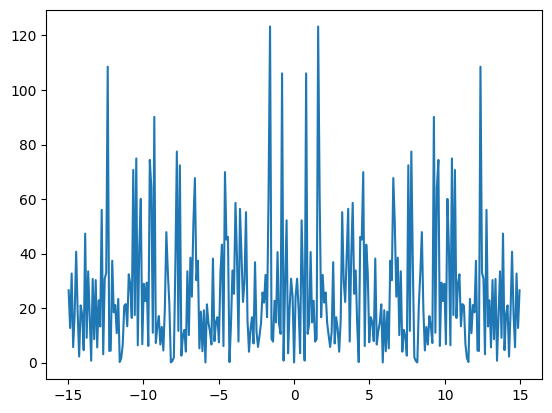

In [5]:
# stack overflow example
from __future__ import division
data = np.random.rand(301) - 0.5
ps = np.abs(np.fft.fft(data))**2
time_step = 1 / 30
freqs = np.fft.fftfreq(data.size, time_step)
idx = np.argsort(freqs)
plt.plot(freqs[idx], ps[idx])

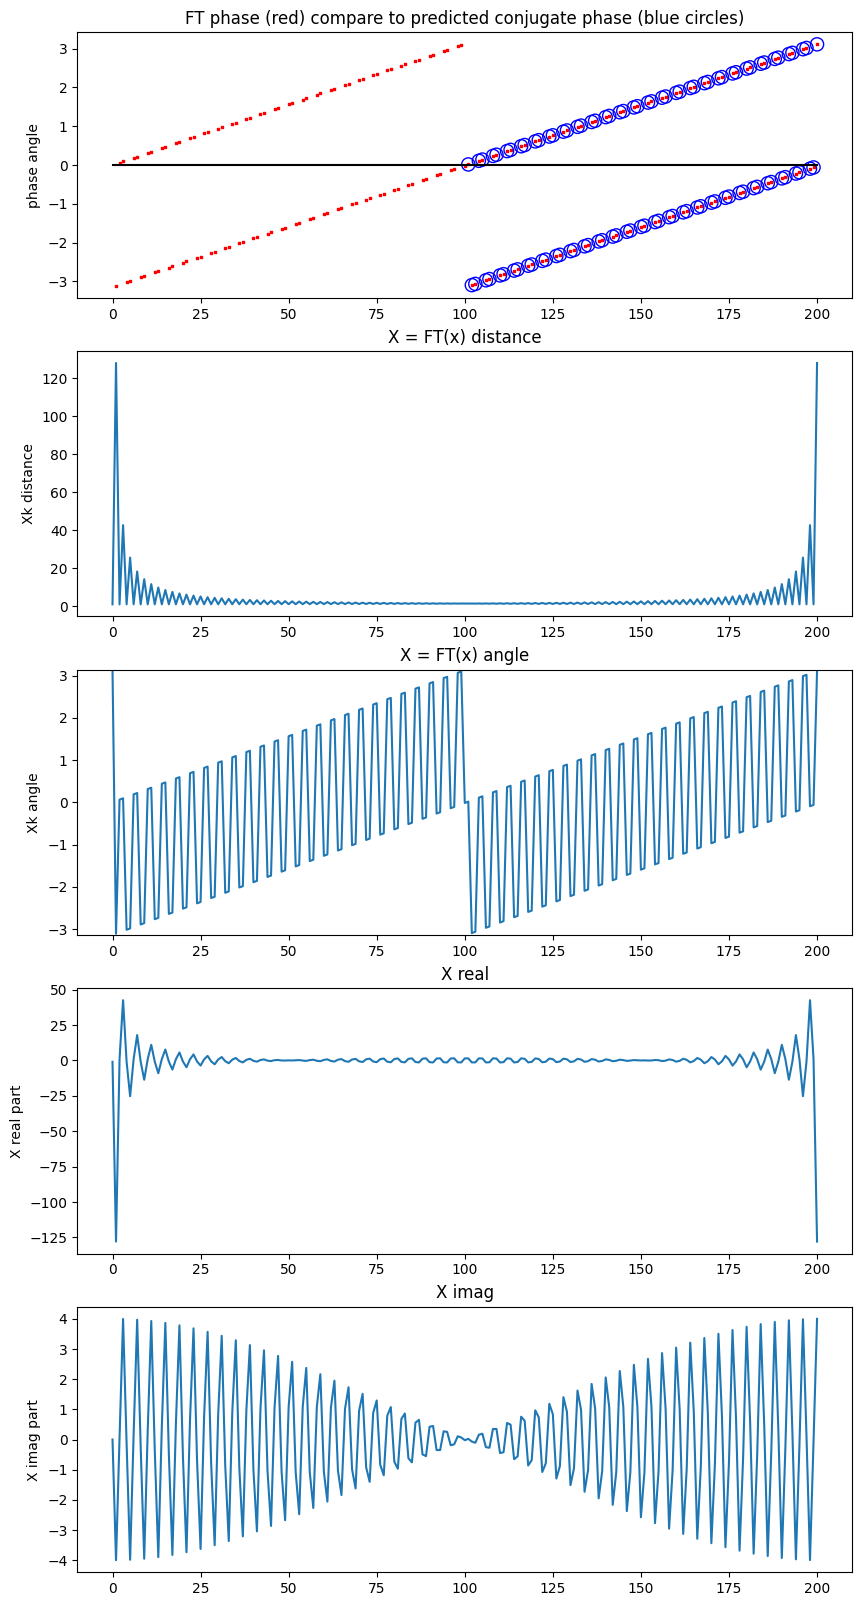

In [6]:
fig,axs=plt.subplots(5,1,figsize=(10, 20))

Xr, Xi, Xd, Xa, N = ForwardDFT(x)

pc, pcx, refl, reflx = [], [], [], []

for i in range((N-1)//2):
    
    # both negative and positive sweep directions
    pc.append(Xa[(i+1)])
    pc.append(Xa[N-(i+1)])
    
    # corresponding indices (become x-coordinates)
    pcx.append(i+1)
    pcx.append(N-(i+1))
    
    # reflect: uses only the negative sweeps
    #   Each sweep Xn has a phase angle
    #   We predict the corresponding opposite sweep has the negative of this phase
    #   These are called to conjugate phase (predicts the 
    refl.append(-Xa[(i+1)])
    reflx.append(N-i-1)
    
axs[0].scatter(pcx, pc, s=4, marker=',', color='r')
axs[0].scatter(reflx, refl, s=90, facecolors='none', edgecolors='b')
axs[0].plot([0, N-1], [0, 0], color='k')
    
axs[1].plot(Xd)
axs[2].plot(Xa)
axs[3].plot(Xr)
axs[4].plot(Xi)

axs[0].set(ylabel = 'phase angle', 
           title='FT phase (red) compare to predicted conjugate phase (blue circles)')
axs[1].set(ylabel = 'Xk distance', title='X = FT(x) distance')
axs[2].set(ylabel = 'Xk angle',    title='X = FT(x) angle', ylim=(-pi, pi))
axs[3].set(ylabel = 'X real part', title='X real')
axs[4].set(ylabel = 'X imag part', title='X imag')

plt.show()

# axs[2][1].plot([-3,-2,-1,0,1],[10,-3,27,-12,5], color='red', marker='v', ms=9)
# axs[2][2].plot([6,5.1,3.9,3.1,1.8,1.2,0.1,-1,-6, -3, -4], color='black', linewidth=4)

## Reconstruct $\tilde{x}$: What is the calculation?


For the real sum of sine and cosine waves we have $N$ values of $X$. Fix the index as $k$. 


A particular $n$ corresponds to a point along the x-axis of the sine/cosine wave. Or more
properly the *n-axis*. 


For a given $k$ and a given $n$ we are interested in 


$$Re \left( \frac{1}{N} \left( (X_{r} + i X_{i})_k \cdot (\cos{\frac{2 \pi n k}{N}} + i sin{\frac{2 \pi n k}{N}}) \right) \right)$$





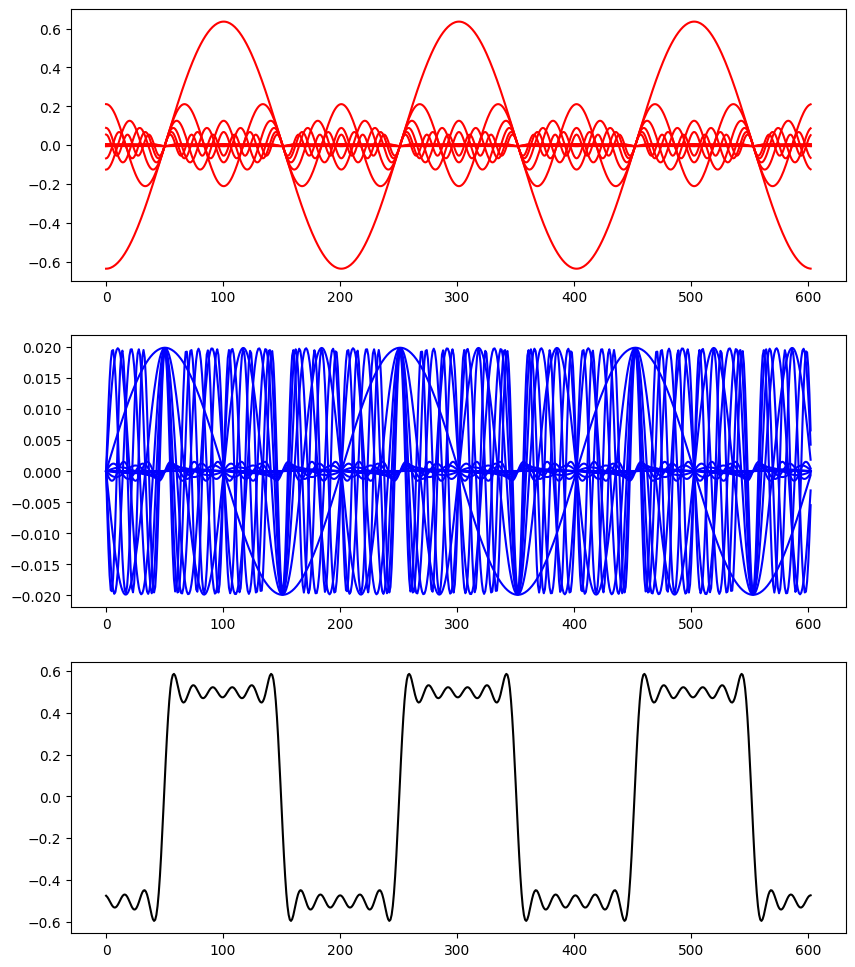

In [7]:
fig,axs=plt.subplots(3, figsize=(10, 12))
nWaveforms = 12
nCopies = 3
sumwave = [0.]*N*nCopies
for k in range(nWaveforms):
    Xkr, Xki, coswave, sinwave = Xr[k], Xi[k], [], []
    for n in range(N*nCopies):
        coswave.append((1/N)*Xkr*(cos(2*pi*n*k/N)))
        sinwave.append((1/N)*Xki*(-sin(2*pi*n*k/N)))
    axs[0].plot(coswave, color='r')
    axs[1].plot(sinwave, color='b')
    sumwave = [sum(c) for c in zip(sumwave, [sum(c) for c in zip(coswave, sinwave)])] 
axs[2].plot(sumwave, color='k')
fig.show()

# Reconstruct the imaginative part of $\tilde{x}$

What about the $i$ part? The rainbows have spoken; pure imaginative:
$i \cdot \frac{1}{N}(X_r \cdot sin{\frac{2 \pi n k}{N}} + X_i \cdot \cos{\frac{2 \pi n k}{N}})$

N =  201
Using these k:  [0, 1, 200, 2, 199]


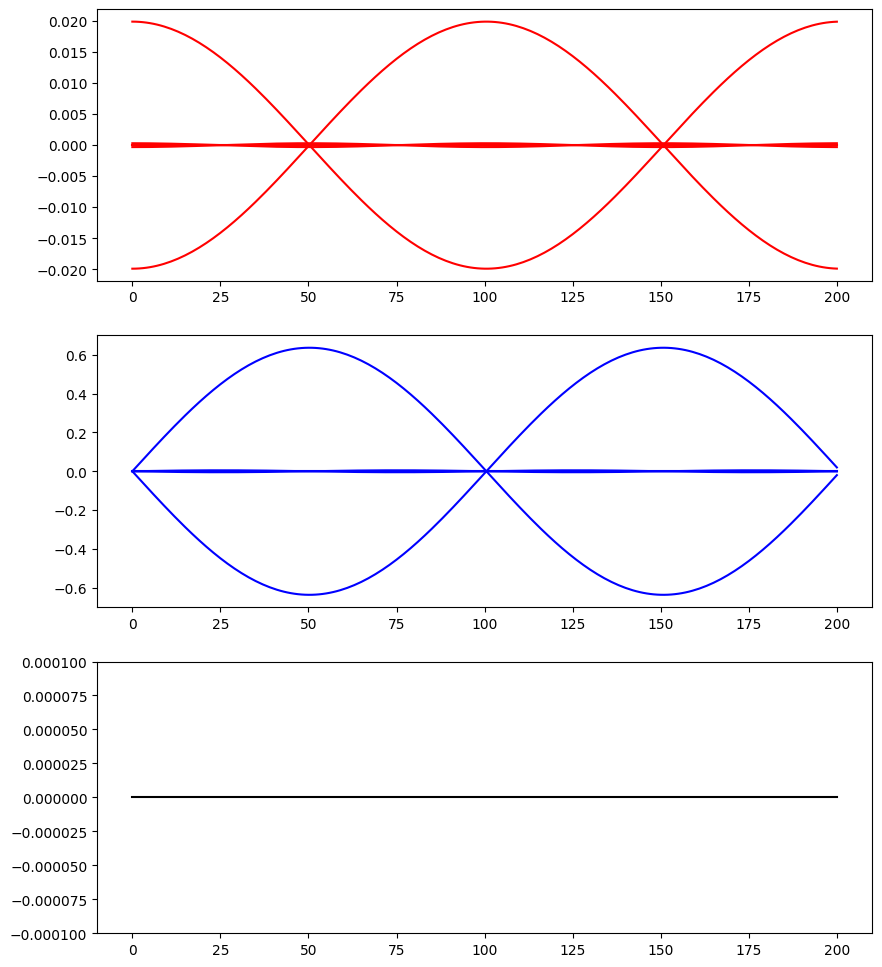

In [8]:
fig,axs=plt.subplots(3, figsize=(10, 12))
nWaveformPairs = 2
waveform_indices = [0]
for i in range(nWaveformPairs):
    waveform_indices.append(i + 1)
    waveform_indices.append(N-1-i)
    
print("N = ", N)
print("Using these k: ", waveform_indices)

sumwave = [0.]*N
for k in waveform_indices:
    Xkr, Xki, coswave, sinwave = Xr[k], Xi[k], [], []
    for n in range(N):
        sinwave.append((1/N)*Xkr*sin(2*pi*n*k/N))
        coswave.append((1/N)*Xki*cos(2*pi*n*k/N))
    axs[0].plot(coswave, color='r')
    axs[1].plot(sinwave, color='b')
    sumwave = [sum(c) for c in zip(sumwave, [sum(c) for c in zip(coswave, sinwave)])] 
axs[2].plot(sumwave, color='k')
axs[2].set(ylim=(-0.0001,0.0001))
fig.show()

This is supposed to be zero for all $n$ since $\tilde{x}$ is real and this is the reconstructed imaginative part of $\tilde{x}$.

In [9]:
# task: describe the three functions in this cell

# FourierPlot taks a real vector x; produces a series of plots
#   - x
#   - power spectrum ( FT (x) )
#   - pairs of charts for list nWaveforms = [3, 10, etc up to N]
#       - red cosine waves, blue sine waves
#       - composition from 0, 1, ..., nWaveforms[w]-1
#
# Issue: The reconstruction order is biased in going low - high - low(opposite) order

def FourierPlot(x, nCopies, nWaveforms = [10]):
    nWaveY = (max(x) + min(x))/2
    Xr, Xi, Xd, Xa, N = ForwardDFT(x)                            # from real x > DFT(x)
    nCharts = 1 + 1 + 2*len(nWaveforms)
    fig,axs=plt.subplots(nCharts, figsize=(8, 3*nCharts))
    axs[0].plot(x)
    axs[1].plot(PSD(Xr, Xi))
    for w in range(len(nWaveforms)):
        sumwave = [0.]*N*nCopies
        for k in range(nWaveforms[w]):
            Xkr, Xki, coswave, sinwave = Xr[k], Xi[k], [], []
            for n in range(N*nCopies):
                coswave.append((1/N)*Xkr*(cos(2*pi*n*k/N)))
                sinwave.append((1/N)*Xki*(-sin(2*pi*n*k/N)))
            axs[2 + 2*w].plot(coswave, color='r')
            axs[2 + 2*w].plot(sinwave, color='b')
            sumwave = [sum(c) for c in zip(sumwave, [sum(c) for c in zip(coswave, sinwave)])] 
        axs[2 + 2*w + 1].plot(sumwave, color='k')
        axs[2 + 2*w + 1].text(0, nWaveY, str(nWaveforms[w]))
    fig.show()
    
def Sinewave(n, omega, phi): return [sin(omega*i+phi) for i in range(n)]

def Noise(x, a, b): return([a*random() + b + x[i] for i in range(len(x))])

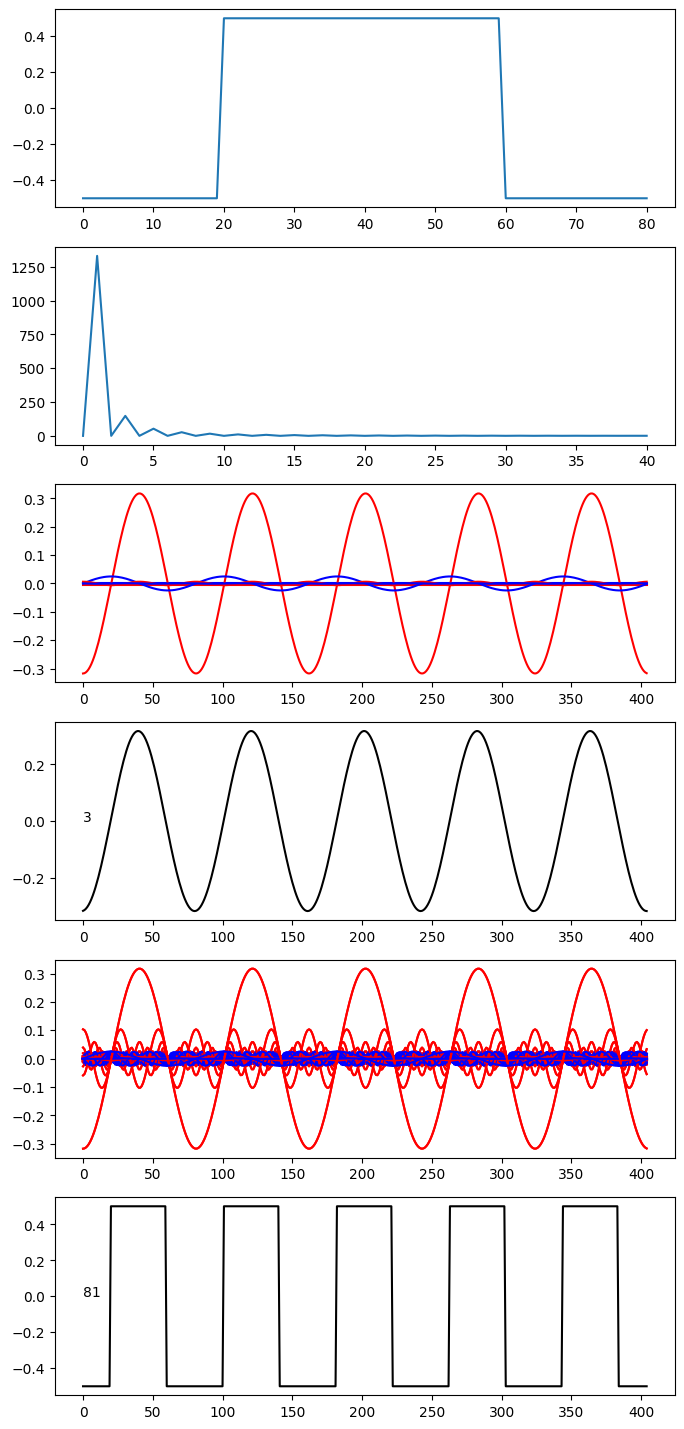

In [10]:
x, segment = [], 20

low = -.5
high = .5
for i in range(segment): x.append(low)
for i in range(2*segment): x.append(high)
for i in range(segment): x.append(low)
x.append(low)
nCopies = 5
nWaveforms = [3, 81]                           # 6, 10, 30, 60, 61, 80, 
FourierPlot(x, nCopies, nWaveforms) 

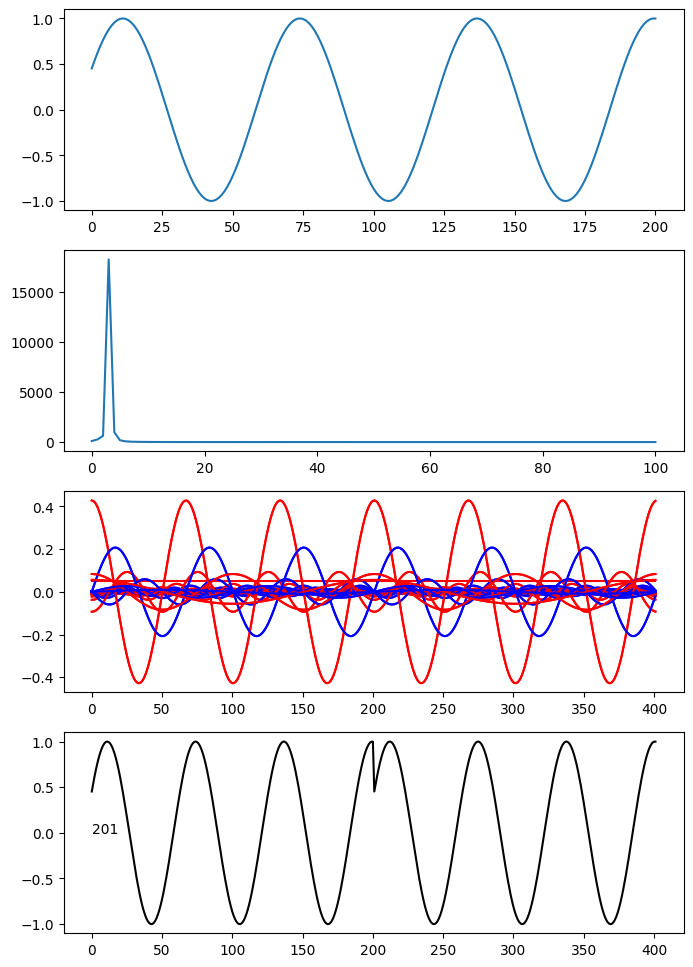

In [11]:
nPts = 201
x = Sinewave(nPts, .1, .47)
nCopies = 2
nWaveforms = [nPts]                           # 6, 10, 30, 60, 61, 80, 
FourierPlot(x, nCopies, nWaveforms) 

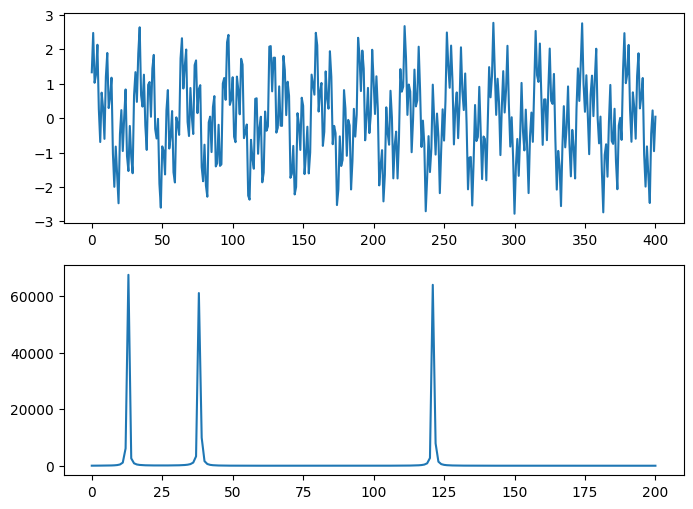

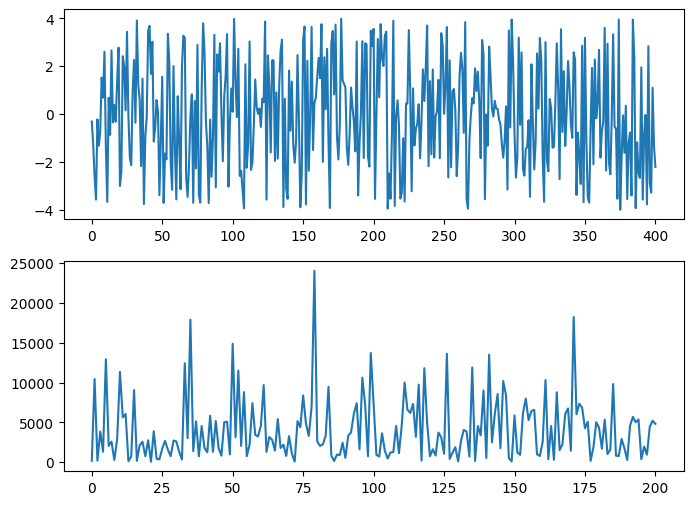

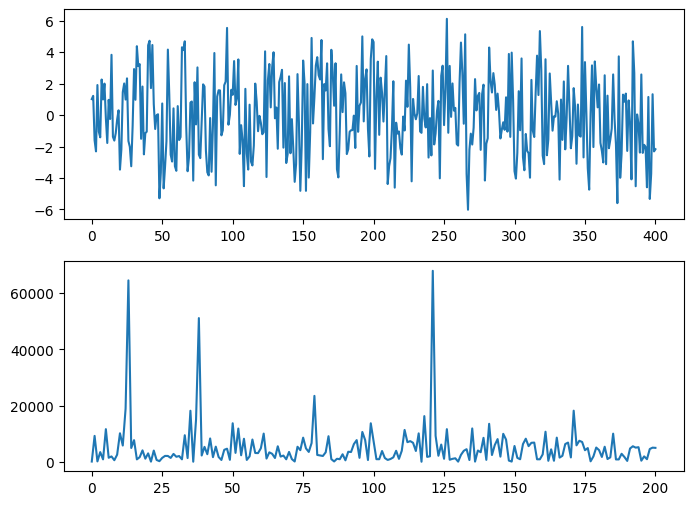

In [12]:
# task: Suppose your friend Caprice claims that the Fourier Transform is a linear function. 

n = 401

freqs = [1.9, .6, .2]
x = [0.]*n
for i in range(len(freqs)):
    s = Sinewave(n, freqs[i], random())
    x = [sum(c) for c in zip(x, s)]

y = Noise([0.]*n, 8, -4)
z = [sum(c) for c in zip(x, y)]


FourierPlot(x, 1, [])
FourierPlot(y, 1, [])
FourierPlot(z, 1, [])

LTI...

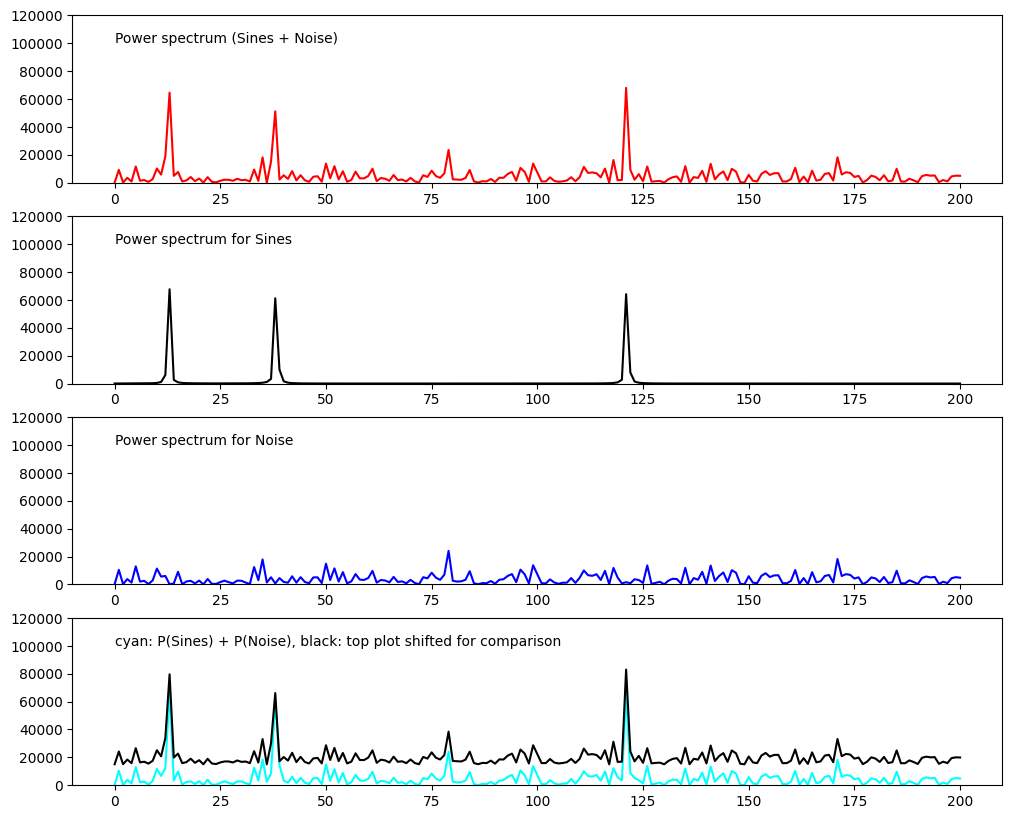

In [13]:
# What is your opinion of Caprice's claim?

xXr, xXi, xXa, xXp, N = ForwardDFT(x)
yXr, yXi, yXa, yXp, N = ForwardDFT(y)
zXr, zXi, zXa, zXp, N = ForwardDFT(z)

xp = PSD(xXr, xXi)
yp = PSD(yXr, yXi)
xp_add_yp = [sum(c) for c in zip(xp, yp)]
zp = PSD(zXr, zXi)
zp_shift = [z+15000. for z in zp]



fig,axs=plt.subplots(4, figsize=(12,10))
axs[0].plot(zp, color='r')
axs[1].plot(xp, color='k')
axs[2].plot(yp, color='b')
axs[3].plot(xp_add_yp, color='cyan')
axs[3].plot(zp_shift, color='k')
for i in range(4): axs[i].set(ylim=(0,120000))
axs[0].text(0, 100000, 'Power spectrum (Sines + Noise)')
axs[1].text(0, 100000, 'Power spectrum for Sines')
axs[2].text(0, 100000, 'Power spectrum for Noise')
axs[3].text(0, 100000, 'cyan: P(Sines) + P(Noise), black: top plot shifted for comparison ')
fig.show()


In [14]:
!ls *.png

diagonals.png  pink_flower.png	robs_image3.png  robs_image6.png
image.png      robs_image.png	robs_image4.png  robs_image7.png
image2.png     robs_image2.png	robs_image5.png  robs_image8.png


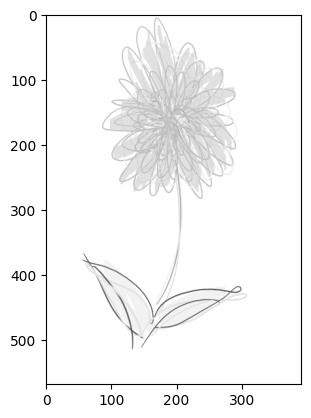

In [15]:
def rgb2gray(rgb): 
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

img = mpimg.imread('./image.png')
img = rgb2gray(img)
plt.imshow(img, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
fig.show()

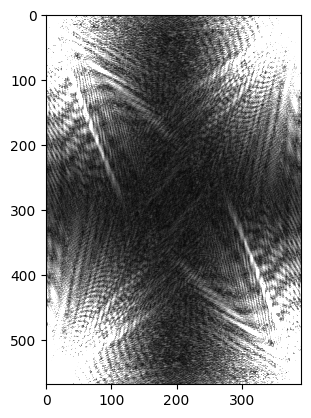

In [16]:
f = magnitude(fft2(img))
plt.imshow(f, cmap=plt.get_cmap('gray'), vmin=0, vmax=30)

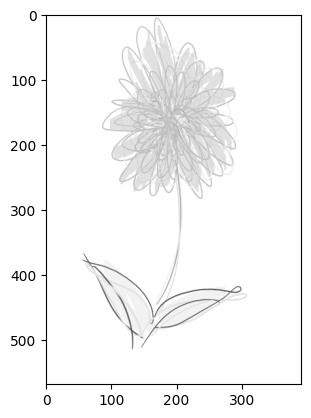

In [17]:
f = magnitude(ifft2(fft2(img)))
plt.imshow(f, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)

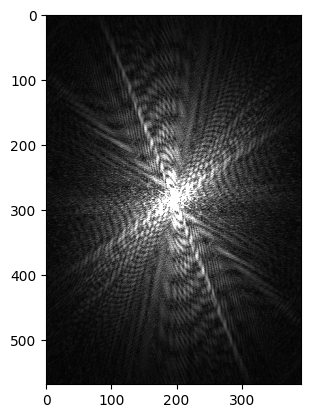

In [18]:
ft = magnitude(fft2(img))
ft_center = ft.copy()
h = len(ft)
w = len(ft[0])

def map(i, j, w, h):
    w2 = w // 2
    h2 = h // 2
    w2p = w2 if not w % 2 else w2 + 1
    h2p = h2 if not h % 2 else h2 + 1
    if i < h2p: k = i + h2
    else: k = i - h2p
    if j < w2p: l = j + w2
    else: l = j - w2p
    return k, l

for i in range(h):
    for j in range(w):
        k, l = map(i, j, w, h)
        ft_center[i][j] = ft[k][l]

plt.imshow(ft_center, cmap=plt.get_cmap('gray'), vmin=0, vmax=100)